<a href="https://colab.research.google.com/github/shimul1725/Microsoft-Stock-Price-Prediction-with-Machine-Learning/blob/main/Microsoft_Stock_Price_Prediction_with_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.style.use('fivethirtyeight')

data = pd.read_csv("MSFT.csv")
print(data.head())

         Date        Open        High         Low       Close   Adj Close  \
0  2022-07-18  259.750000  260.839996  253.300003  254.250000  251.815887   
1  2022-07-19  257.579987  259.720001  253.679993  259.529999  257.045349   
2  2022-07-20  259.899994  264.869995  258.910004  262.269989  259.759094   
3  2022-07-21  259.790009  264.890015  257.029999  264.839996  262.304504   
4  2022-07-22  265.239990  265.329987  259.070007  260.359985  257.867401   

     Volume  
0  20975000  
1  25012600  
2  22788300  
3  22404700  
4  21881300  


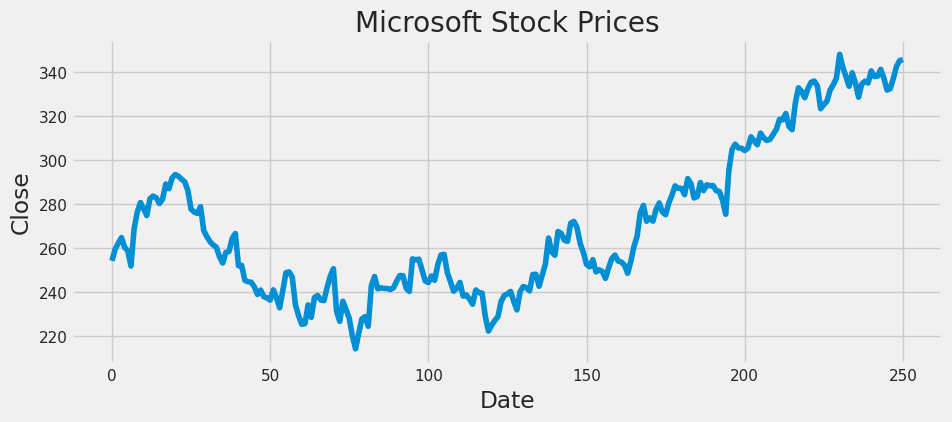

In [2]:
#let’s have a closer look at the historical close prices of Microsoft’s stock price:
plt.figure(figsize=(10, 4))
plt.title("Microsoft Stock Prices")
plt.xlabel("Date")
plt.ylabel("Close")
plt.plot(data["Close"])
plt.show()

<ipython-input-3-e067295b7ee6>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(data.corr())
<ipython-input-3-e067295b7ee6>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


               Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.997149  0.997853  0.993221   0.993140 -0.163130
High       0.997149  1.000000  0.997666  0.997477   0.997367 -0.137859
Low        0.997853  0.997666  1.000000  0.997158   0.997072 -0.174814
Close      0.993221  0.997477  0.997158  1.000000   0.999832 -0.154939
Adj Close  0.993140  0.997367  0.997072  0.999832   1.000000 -0.151843
Volume    -0.163130 -0.137859 -0.174814 -0.154939  -0.151843  1.000000


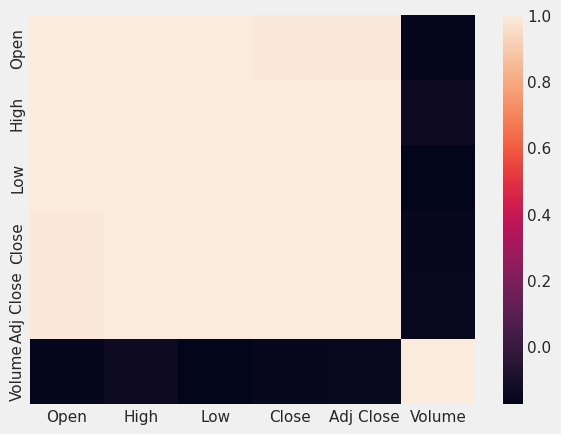

In [3]:
#Now let’s have a look at the correlation between the features of this dataset:

print(data.corr())
sns.heatmap(data.corr())
plt.show()

In [4]:
#I will divide the dataset into training and test sets:
x = data[["Open", "High", "Low"]]
y = data["Close"]
x = x.to_numpy()
y = y.to_numpy()
y = y.reshape(-1, 1)

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [5]:
#Now let’s use the Decision Tree Regression Algorithm to train the Microsoft Stock Price prediction model and have a look at the predicted stock prices for the next 5 days:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)
data = pd.DataFrame(data={"Predicted Rate": ypred})
print(data.head())

   Predicted Rate
0      249.220001
1      254.770004
2      254.690002
3      225.750000
4      239.229996
